<a href="https://colab.research.google.com/github/tousif99/Copy_of_HEALTH_INSURANCE_CROSS_SELL_PREDICTION/blob/main/Copy_of_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name -**   **HEALTH INSURANCE CROSS SELL PREDICTION**



---






# **Project type -** **Classifiaction**


# **Contribution - Team**

# **Name -**
1. Tousif Sheikh

2. Mohammad Sufawan

3. Uday Kumar


# **Problem Statement**



---



Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

# **Our Goal -**


---



Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.



# **Attribute Information-**

---



1. id : **Unique ID for the customer**

2. Gender : **Gender of the customer**

3. Age : **Age of the customer**

4. Driving_License  : **0 - Customer does not have DL,  1 - Customer already has DL**

5. Region_Code : **Unique code for the region of the customer**

6. Previously_Insured : **1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance**

7. Vehicle_Age : **Age of the Vehicle**

8. Vehicle_Damage : **1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.**

9. Annual_Premium : **The amount customer needs to pay as premium in the year**

10. PolicySalesChannel : **Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.**

11. Vintage : **Number of Days, Customer has been associated with the company**

12. Response : **1 : Customer is interested, 0 : Customer is not interested**



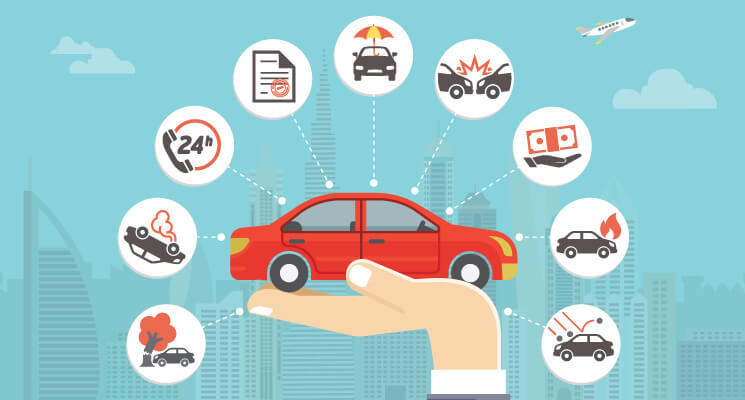





# **GitHub Link -**
**Tousif-**
 https://github.com/tousif99/Copy_of_HEALTH_INSURANCE_CROSS_SELL_PREDICTION/blob/main/Copy_of_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb

**Sufawan-**
 https://github.com/sufawan20/HEALTH_INSURANCE_CROSS_SELL_PREDICTION-CLASSIFICATION-PROJECT/blob/main/Copy_of_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb

## ***Let's Begin !***

## **Importing Required libraries**

---



In [2]:
# import libraries
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# THE REST OF LIBRARIES I WILL BE IMPORTING WHEN I WILL NEED THEM

# **loading the dataset**

In [3]:
#let's mount the google drive for import the dtaset
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
# LOAD DATASET
insurance_df = pd.read_csv('/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

### Dataset First View

In [5]:
#  LET'S SEE FIRST 5 ROWS OF OUR DATSET
insurance_df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
# LET'S SEE BOTTOM 5 ROWS OF OUR DATASET
insurance_df.tail(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [7]:
# LET'S SEE HOW MANY ROWS AND COLUMN ARE PRESENT IN THIS DATASET
insurance_df.shape

(381109, 12)

OUR DATASET HAVE **381109 ROWS AND 12 COULMNS.**

In [8]:
#check details about the data set
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [9]:
# LET'S SEE OUR DATASET HACE NULL VALUES OR NOT
print(insurance_df.isna().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


**There is no missing values present in dataset.**

In [10]:
# #Looking for the description of the dataset
insurance_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


**Checking Duplicate values**

In [11]:
insurance_df.duplicated().sum()

0

**Our dataset has no duplicate values**

# **Performing EDA**

# **1.Age v/s Response**

---



[Text(0.5, 1.0, 'age v/s response')]

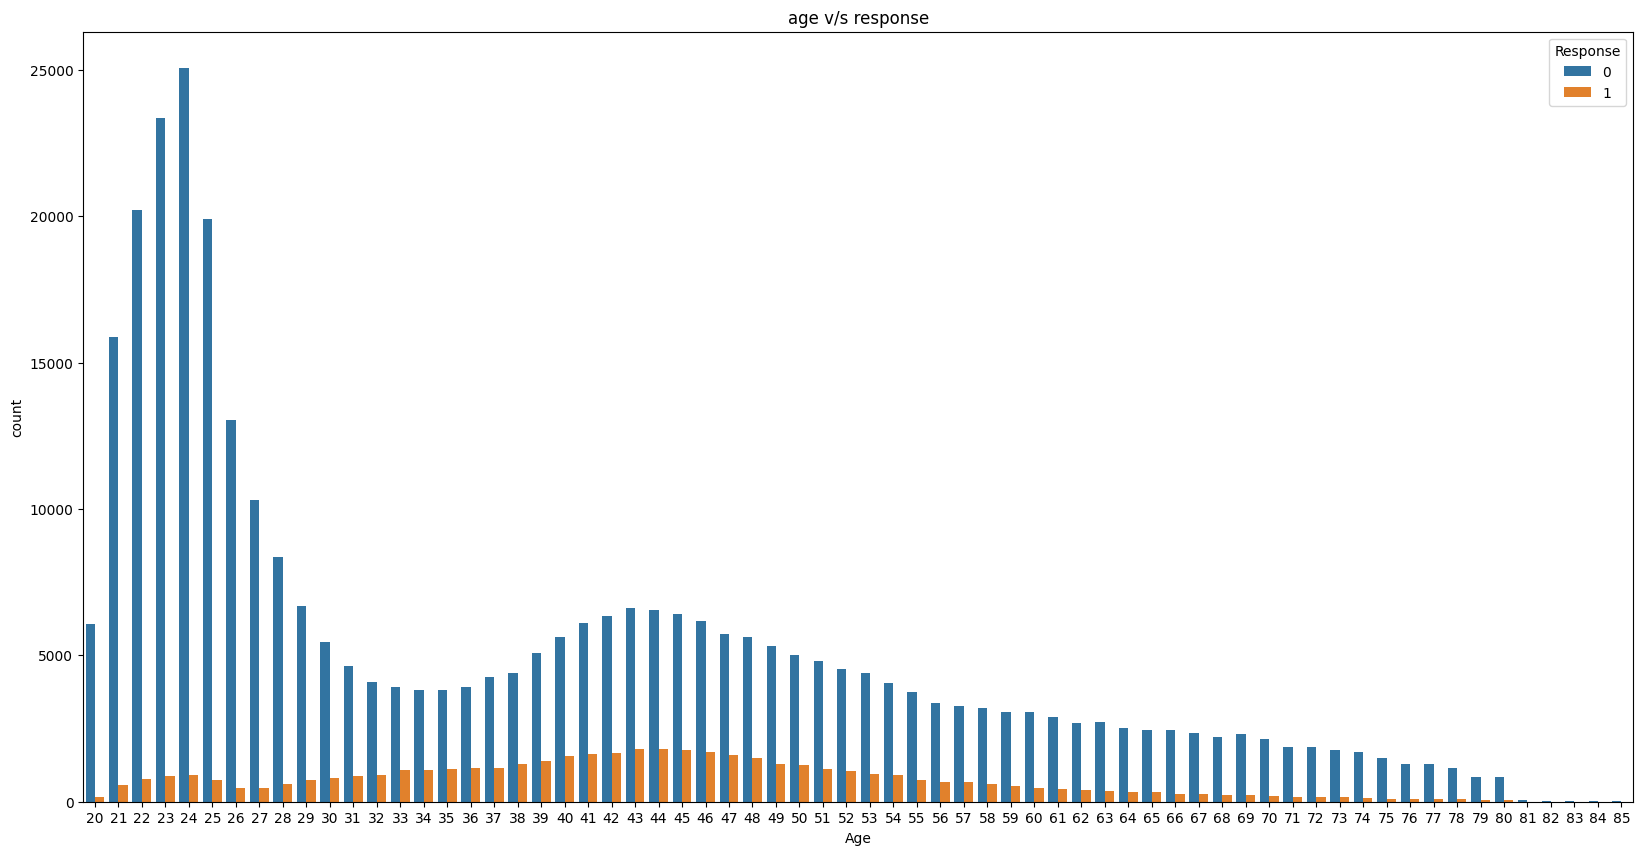

In [12]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,10))
sns.countplot(data=insurance_df,hue='Response',x='Age',ax=ax,capsize=0.2)
ax.set(title='age v/s response')

**From above plot we can see that young people below 30 are not interested in vehicle insurance.**

**People aged between 30-60 are more likely to be interested**

**one of the reason can be - Lack of perceived value:**

**Some young people may not see the value of purchasing vehicle insurance, particularly if they have never been in an accident or have had any issues with their vehicle.**

**another reason may be " overconvidence"**

 **Young drivers may feel overconfident in their driving skills and believe that they are less likely to get into an accident, which may lead them to avoid purchasing vehicle insurance.**

# **2.Response**

---



[Text(0.5, 1.0, 'count plot of response')]

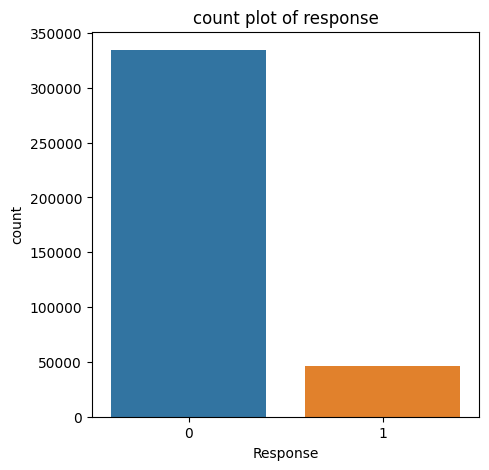

In [13]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(5,5))
sns.countplot(data=insurance_df,x='Response',ax=ax,capsize=0.2)
ax.set(title='count plot of response')

**From above plot we can see that only 50000 people have vechicle insurance and
its highly imbalanced**


---



# **3.Gender v/s Response**

[Text(0.5, 1.0, 'gender v/s response')]

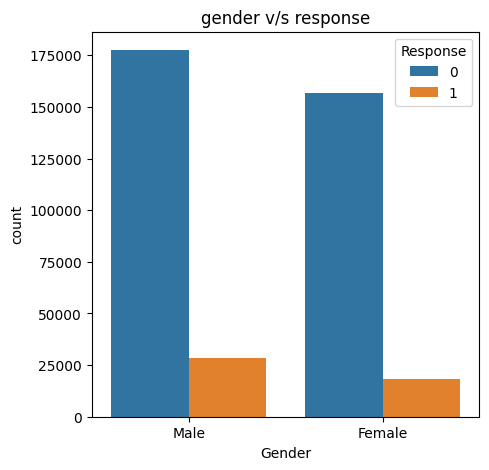

In [14]:
# anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(5,5))
sns.countplot(data=insurance_df,x='Gender',hue= 'Response' , ax=ax,capsize=0.2)
ax.set(title='gender v/s response')

**From above plot we can that
The gender variable in the dataset is almost equally distributed.**

**Male category is slightly greater than that of female and chances of buying the insurance is also little high.**

# **4.Driving License v/s Response**

[Text(0.5, 1.0, 'Driving lincense  v/s response')]

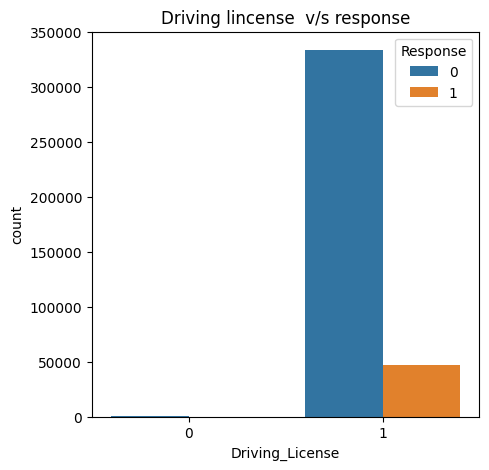

In [15]:
# anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(5,5))
sns.countplot(data=insurance_df,x='Driving_License',hue= 'Response' , ax=ax,capsize=0.2)
ax.set(title='Driving lincense  v/s response')

**From above plot we can see that Customers who are interested in Vehicle Insurance almost all have driving license.**

# **5.Vechicle Damage v/s Response**


---



[Text(0.5, 1.0, 'Vehicle_Damage v/s response')]

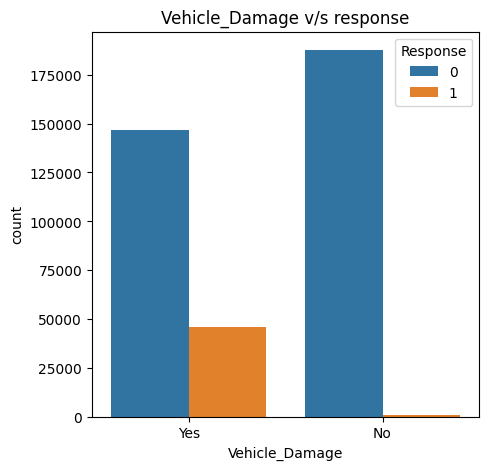

In [16]:
# anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(5,5))
sns.countplot(data=insurance_df,x='Vehicle_Damage',hue= 'Response' , ax=ax,capsize=0.2)
ax.set(title='Vehicle_Damage v/s response')

**From above plot we can see that customers who have NO vehicle damage are more interested in vehical insurance .**

 this may be because of

 **Perception of value: Customers who have never had vehicle damage may be more aware of the potential risks and costs associated with driving without insurance, and therefore may see more value in purchasing insurance.**



# **6.Vehicle_Age v/s response**

---



[Text(0.5, 1.0, 'Vehicle_Age v/s response')]

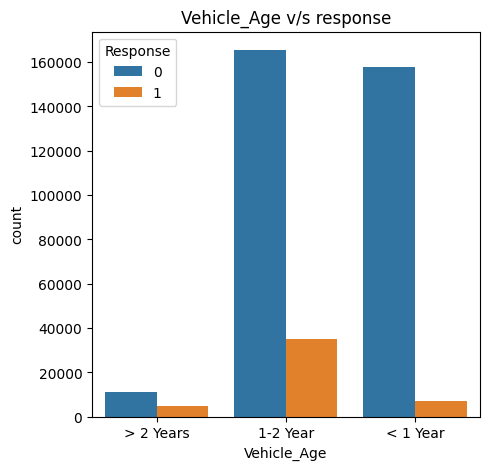

In [17]:
# anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(5,5))
sns.countplot(data=insurance_df,x='Vehicle_Age',hue= 'Response' , ax=ax,capsize=0.2)
ax.set(title='Vehicle_Age v/s response')

**From above plot we can see that
Customers with vechicle age 1-2 years are more likely to interested** as compared to the other two

Customers with with **Vehicle_Age <1 years** have very less chance of buying Insurance

# **7.Previously Insured v/s Response**

---



[Text(0.5, 1.0, 'Previously_Insured v/s response')]

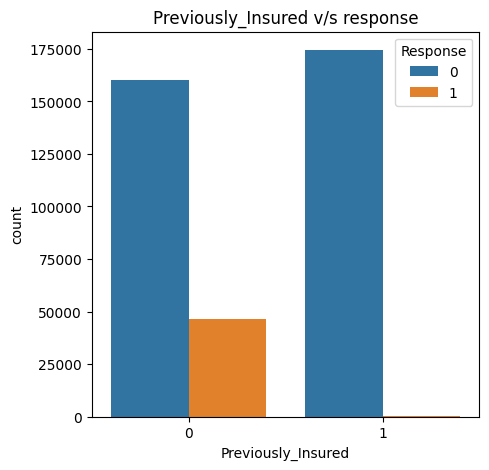

In [18]:
# anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(5,5))
sns.countplot(data=insurance_df,x='Previously_Insured',hue= 'Response' , ax=ax,capsize=0.2 )
ax.set(title='Previously_Insured v/s response')

**From above plot we can see that Customer who are not perviosly insured are likely to be inetrested.**

**8.Distribution plot**

In [19]:
num_col=['Age','Annual_Premium']

<ipython-input-20-28e1a6432f8c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_df[item])
<ipython-input-20-28e1a6432f8c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_df[item])


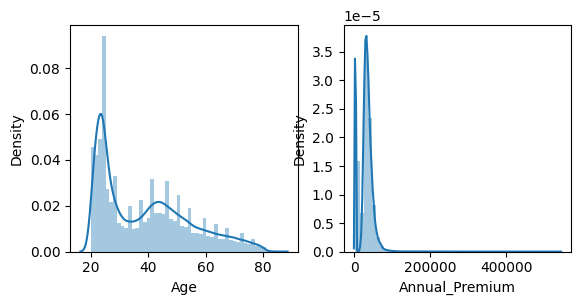

In [20]:
# checking the distribution
plt.figure(figsize=(10,10))
for index,item in enumerate(num_col):
  plt.subplot(3,3,index+1)
  sns.distplot(insurance_df[item])



**From above plot we can see that Age and Annual premium  are right skewed.**





**9.let's see boxplot of Age and Annual premium**

---



In [21]:
ins_cols = insurance_df.select_dtypes(include=['int64', 'float64']).columns

In [22]:
ins_cols = ['Annual_Premium','Age']


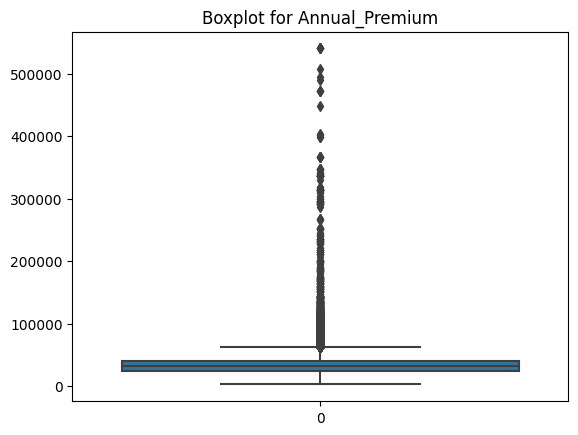

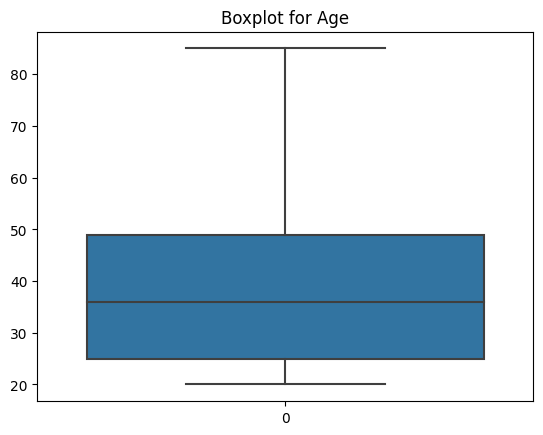

In [23]:
# Create a boxplot for each numerical column to check for outliers
for col in ins_cols:
    sns.boxplot(insurance_df[col])
    plt.title('Boxplot for ' + col)
    plt.show()

**From above boxplot we can see that Age has no outliers but Annual premium has outliers.**

In [24]:
# Calculate the interquartile range (IQR) for the "Annual_Premium" column
q1 = insurance_df['Annual_Premium'].quantile(0.25)
q3 = insurance_df['Annual_Premium'].quantile(0.75)
iqr = q3 - q1

# Calculate the lower and upper bounds for outliers
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

# Remove outliers from the "Annual_Premium" column
df = insurance_df[(insurance_df['Annual_Premium'] >= lower_bound) & (insurance_df['Annual_Premium'] <= upper_bound)]

**NOW LET'S SEE OUTLIERS REMOVED OR NOT IN ANNUAL PREMIUM**

---



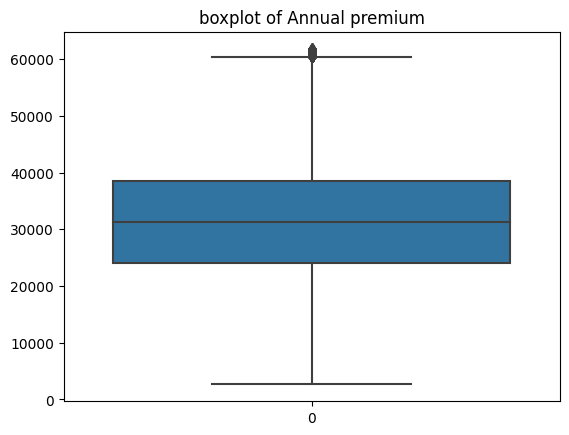

In [25]:
sns.boxplot(df['Annual_Premium'])
plt.title("boxplot of Annual premium")
plt.show()

**So , outliers in annual premium has removed.**

# **Correlation Matrix**

---



<ipython-input-26-085e71b13396>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(insurance_df.corr(), annot=True, cmap='coolwarm')


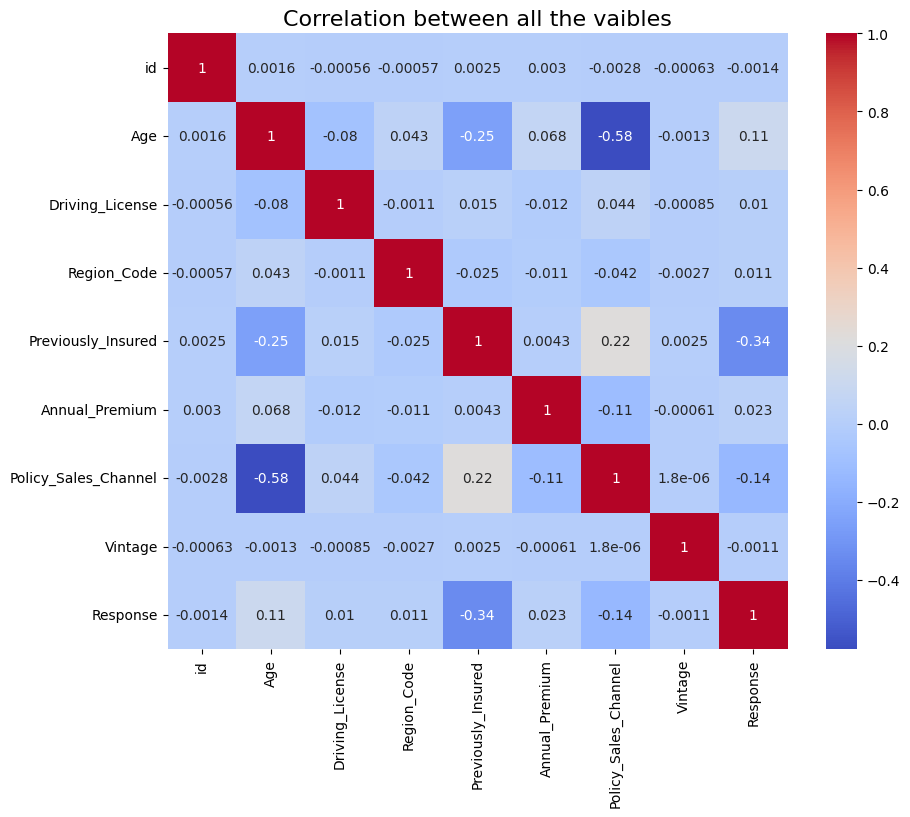

In [26]:
#Heatmap for co-relation in features
plt.figure(figsize=(10, 8))
sns.heatmap(insurance_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between all the vaibles', size=16)
plt.show()

From above correlation matrix  we can see that the **target variable** is not much affected by **Vintage variable**. we can drop least correlated variable.

# **Data Preparation**

---
# **Handling Ctegorical Values**


In [27]:
# NOW WE WILL CONVERT CATEGORICAL VALUES TO NUMERICAL VALUES
from sklearn.preprocessing import LabelEncoder

In [28]:
labelEncoder= LabelEncoder()
insurance_df['Gender'] = labelEncoder.fit_transform(insurance_df['Gender'])
insurance_df['Vehicle_Age'] = labelEncoder.fit_transform(insurance_df['Vehicle_Age'])
insurance_df['Vehicle_Damage'] = labelEncoder.fit_transform(insurance_df['Vehicle_Damage'])


In [29]:
# NOW LET'S SEE THE DTYPES
insurance_df.dtypes

id                        int64
Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [30]:
insurance_df.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1


# **Seprating dependent and independent variables**

In [31]:
x=insurance_df.drop(['Response'],axis=1) #  contain all  independent variable
y=insurance_df['Response']               #  dependent variable

# **Feature Selection**

---



In [32]:
from sklearn.ensemble import ExtraTreesClassifier

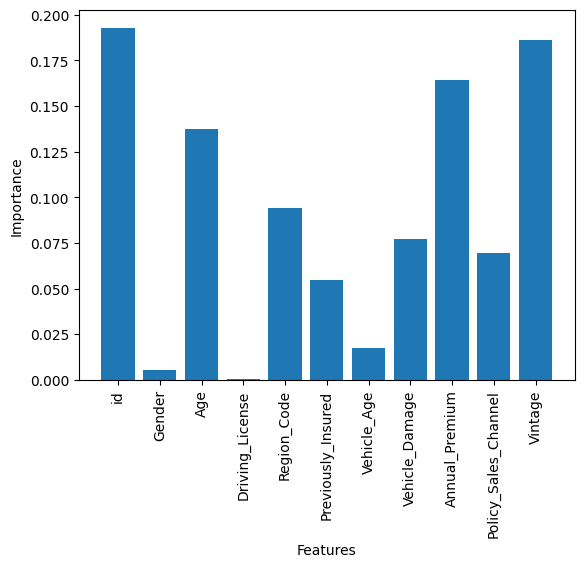

In [33]:
# Create an Extra Trees classifier with 50 trees
etc = ExtraTreesClassifier(n_estimators=50)
# Fit the model on the data
etc.fit(x, y)

# Compute feature importances
importances = etc.feature_importances_

# Create a bar chart of feature importances
plt.bar(x.columns, importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

**From above plot we can see that  less important features are " Gender and Driving License"  from the data set**

In [34]:
# LET'S DROP LESS IMPORTANT FEATURES " GENDER AND DRIVING LICENSE "
insurance_df.drop(['Gender','Driving_License'],axis=1 ,inplace=True)

# **Handling Imbalanced data**



---

Handling imbalanced data is a common challenge in machine learning, where the classes or categories in the dataset are not represented equally.
Solving this issue we use resampling technique.

Original dataset shape Counter({0: 334399, 1: 46710})
Resampled dataset shape Counter({1: 334399, 0: 334399})


<Axes: ylabel='count'>

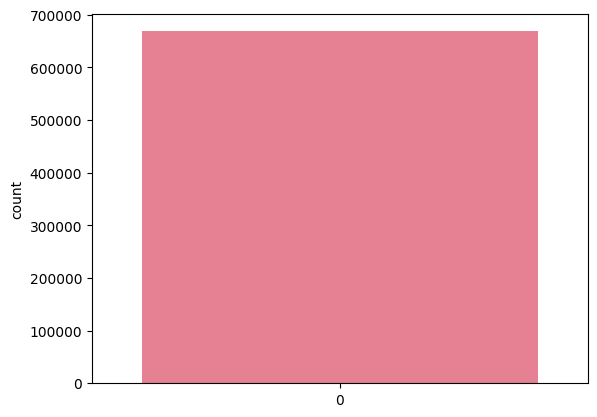

In [35]:
# IMPORTING LIBRABRIES
from imblearn.over_sampling import RandomOverSampler

# initialize RandomOverSampler
random_sample = RandomOverSampler()

# apply oversampling to the dataset
randomsample =  RandomOverSampler()
x_new,y_new = randomsample.fit_resample(x,y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new,palette='husl')



# **Train and Test data**

---



In [36]:
#dividing the dataset into training and testing

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=.30,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(468158, 11) (200640, 11) (468158,) (200640,)


# **Feature Scaling**

---



In [37]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# **Model Selection**

---
Problem can be identified as Binary Classification (wheather customer opts for vehicle insurance or not)

Dataset has more than 300k records

cannot go with SVM Classifier as it takes more time to train as dataset increase

Idea is to start selection of models as:


 **1.Logistic Regression**

 **2.KNN** **Classifier**

**3.Random Forest**

 **4.XGBClassifier**


# **1. Logistic Regression**



---




In [38]:
# IMPORTING LIBRABRY
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
acc_lr= accuracy_score(y_test,y_pred)
recall_lr = recall_score(y_test,y_pred)
precision_lr = precision_score(y_test,y_pred)
f1score_lr= f1_score(y_test,y_pred)

# prediction and evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix


# **Confusion Matrix**

---



In [39]:
print(confusion_matrix(y_test,y_pred))

[[59335 40993]
 [ 2366 97946]]


[[59335 40993]
 [ 2366 97946]]


<Axes: >

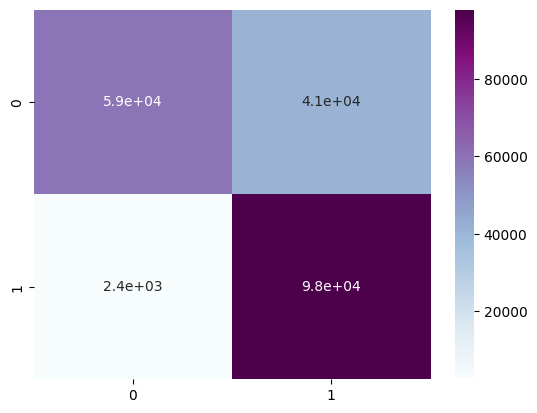

In [40]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

In [41]:
print(accuracy_score(y_test,y_pred))

0.7838965311004785


In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.59      0.73    100328
           1       0.70      0.98      0.82    100312

    accuracy                           0.78    200640
   macro avg       0.83      0.78      0.78    200640
weighted avg       0.83      0.78      0.78    200640



**ROC (Receiver Operating Characteristic) AUC (Area Under the Curve) score**

---



In [43]:
from sklearn.metrics import roc_auc_score # IMPORTING LIBRABRY FOR ROC_AUC SCORE
from sklearn.metrics import roc_curve     # IMPORTING LIBRABRY FOR ROC_CURVE

In [44]:
AUC_LR=roc_auc_score(y_pred,y_test)
print("ROC_AUC Score of Logistic regression is :",AUC_LR)

ROC_AUC Score of Logistic regression is : 0.8333053167581915


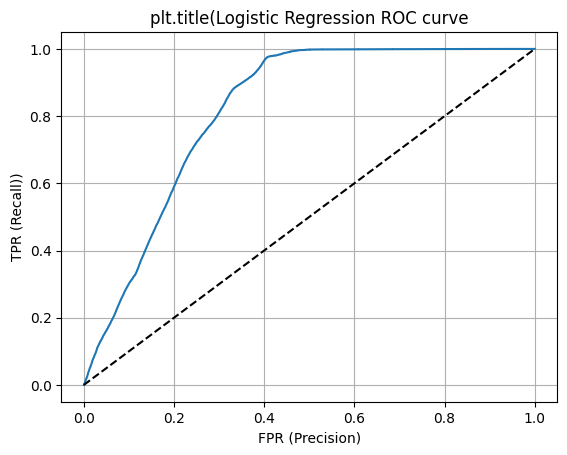

In [45]:
# Get probability estimates for test set
y_score = lr.predict_proba(x_test)[:, 1]

# Get true binary labels for test set
y_true = y_test

# Set pos_label to 1 since we are working with a binary classification problem
pos_label = 1

fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=1)

plt.title('plt.title(Logistic Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall))')
plt.xlabel('FPR (Precision)')



plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.grid(True)
plt.show()



# **2.KNeighborsClassifier**

---





In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(5)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
acc_knn = accuracy_score(y_test,pred)
recall_knn  = recall_score(y_test,pred)
precision_knn = precision_score(y_test,pred)
f1score_knn = f1_score(y_test,pred)


In [47]:
# prediction and evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix

In [48]:
print(confusion_matrix(y_test,pred))

[[74421 25907]
 [ 3576 96736]]


[[74421 25907]
 [ 3576 96736]]


<Axes: >

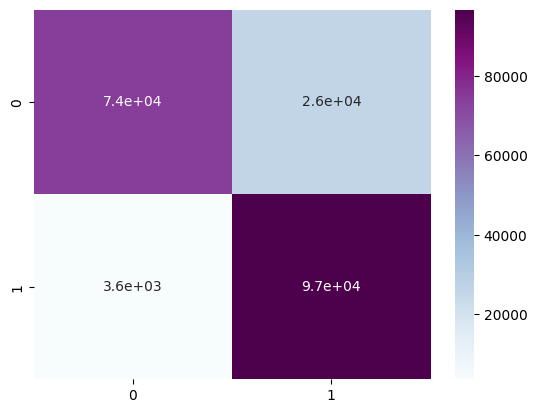

In [49]:
cm = confusion_matrix(y_test,pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

In [50]:
print('Accuracy score of knn',accuracy_score(y_test,pred))

Accuracy score of knn 0.8530552232854864


In [51]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83    100328
           1       0.79      0.96      0.87    100312

    accuracy                           0.85    200640
   macro avg       0.87      0.85      0.85    200640
weighted avg       0.87      0.85      0.85    200640



**ROC (Receiver Operating Characteristic) AUC (Area Under the Curve) score**

In [52]:
from sklearn.metrics import roc_auc_score # IMPORTING LIBRABRY FOR ROC_AUC SCORE
from sklearn.metrics import roc_curve     # IMPORTING LIBRABRY FOR ROC_CURVE

In [53]:
AUC_knn=roc_auc_score(pred,y_test)
print("ROC_AUC Score of KNN is:",AUC_knn)

ROC_AUC Score of KNN is: 0.8714564789162743


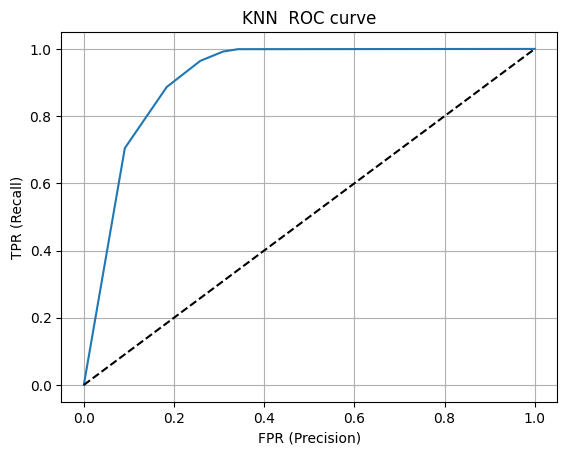

In [54]:
# Get probability estimates for test set
y_score = knn.predict_proba(x_test)[:, 1]

# Get true binary labels for test set
y_true = y_test

# Set pos_label to 1 since we are working with a binary classification problem
pos_label = 1

fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=1)

plt.title('KNN  ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.grid(True)
plt.show()

# **2.KNeighborsClassifier**

---





In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(5)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
acc_knn = accuracy_score(y_test,pred)
recall_knn  = recall_score(y_test,pred)
precision_knn = precision_score(y_test,pred)
f1score_knn = f1_score(y_test,pred)


In [56]:
# prediction and evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix

In [57]:
print(confusion_matrix(y_test,pred))

[[74421 25907]
 [ 3576 96736]]


[[74421 25907]
 [ 3576 96736]]


<Axes: >

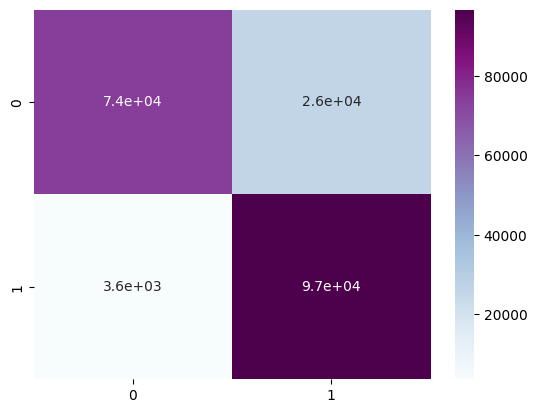

In [58]:
cm = confusion_matrix(y_test,pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

In [59]:
print('Accuracy score of knn',accuracy_score(y_test,pred))

Accuracy score of knn 0.8530552232854864


In [60]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83    100328
           1       0.79      0.96      0.87    100312

    accuracy                           0.85    200640
   macro avg       0.87      0.85      0.85    200640
weighted avg       0.87      0.85      0.85    200640



**ROC (Receiver Operating Characteristic) AUC (Area Under the Curve) score**

In [61]:
from sklearn.metrics import roc_auc_score # IMPORTING LIBRABRY FOR ROC_AUC SCORE
from sklearn.metrics import roc_curve     # IMPORTING LIBRABRY FOR ROC_CURVE

In [62]:
AUC_knn=roc_auc_score(pred,y_test)
print("ROC_AUC Score of KNN is:",AUC_knn)

ROC_AUC Score of KNN is: 0.8714564789162743


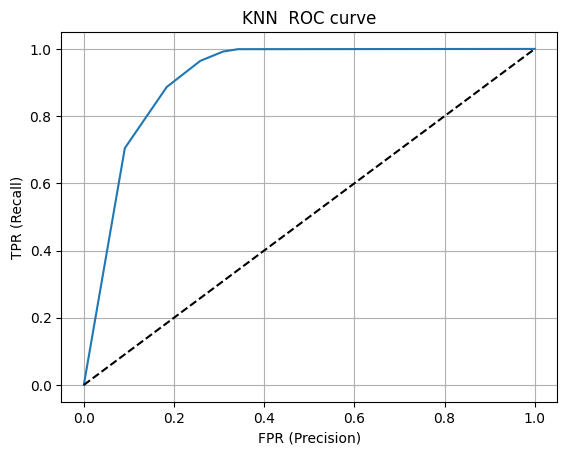

In [63]:
# Get probability estimates for test set
y_score = knn.predict_proba(x_test)[:, 1]

# Get true binary labels for test set
y_true = y_test

# Set pos_label to 1 since we are working with a binary classification problem
pos_label = 1

fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=1)

plt.title('KNN  ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.grid(True)
plt.show()

**3.Random Forest**

---



In [64]:
# IMPORTING LIBRARY
from sklearn .ensemble import RandomForestClassifier

In [65]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred= rf.predict(x_test)

from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
acc_rf = accuracy_score(y_test,rf_pred)
recall_rf  = recall_score(y_test,rf_pred)
precision_rf = precision_score(y_test,rf_pred)
f1score_rf = f1_score(y_test,rf_pred)


In [66]:
# prediction and evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix

In [67]:
print(confusion_matrix(y_test,rf_pred))

[[ 89758  10570]
 [   289 100023]]


[[ 89758  10570]
 [   289 100023]]


<Axes: >

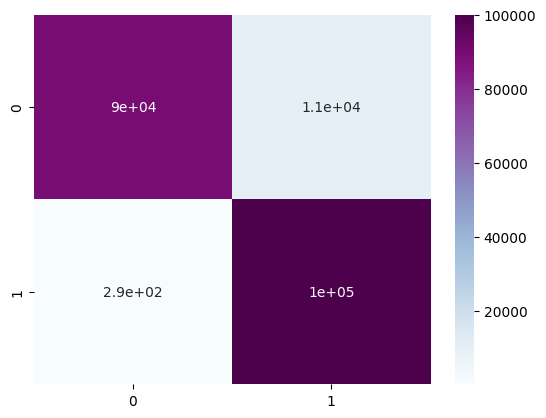

In [68]:
cm = confusion_matrix(y_test,rf_pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

In [69]:
print('Accuracy score of Random Forest is ',accuracy_score(y_test,rf_pred))

Accuracy score of Random Forest is  0.9458781897926635


In [70]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94    100328
           1       0.90      1.00      0.95    100312

    accuracy                           0.95    200640
   macro avg       0.95      0.95      0.95    200640
weighted avg       0.95      0.95      0.95    200640



**ROC (Receiver Operating Characteristic) AUC (Area Under the Curve) score**

In [71]:
from sklearn.metrics import roc_auc_score # IMPORTING LIBRABRY FOR ROC_AUC SCORE
from sklearn.metrics import roc_curve     # IMPORTING LIBRABRY FOR ROC_CURVE

In [72]:
AUC_rf=roc_auc_score(rf_pred,y_test)
print("ROC_AUC Score of Random Forest is:",AUC_rf)

ROC_AUC Score of Random Forest is: 0.9506074477905218


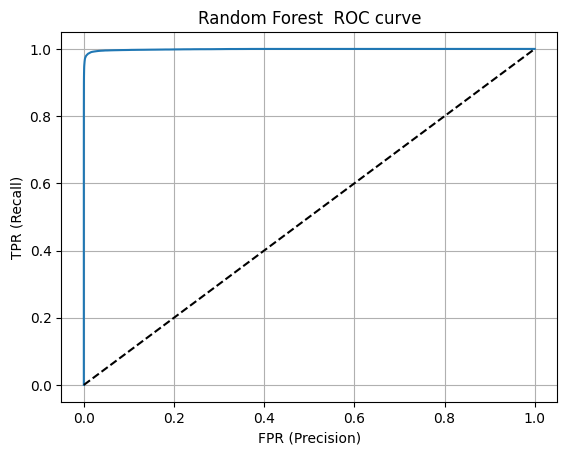

In [73]:
# Get probability estimates for test set
y_score = rf.predict_proba(x_test)[:, 1]

# Get true binary labels for test set
y_true = y_test

# Set pos_label to 1 since we are working with a binary classification problem
pos_label = 1

fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=1)

plt.title('Random Forest  ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.grid(True)
plt.show()

**4.XGBClassifier**

In [74]:

from xgboost import XGBClassifier

In [75]:
xgb=XGBClassifier()
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)

from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
acc_xgb = accuracy_score(y_test,xgb_pred)
recall_xgb  = recall_score(y_test,xgb_pred)
precision_xgb = precision_score(y_test,xgb_pred)
f1score_xgb = f1_score(y_test,xgb_pred)


In [76]:
 #prediction and evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix

In [77]:
print(confusion_matrix(y_test,xgb_pred))

[[68760 31568]
 [ 6832 93480]]


[[68760 31568]
 [ 6832 93480]]


<Axes: >

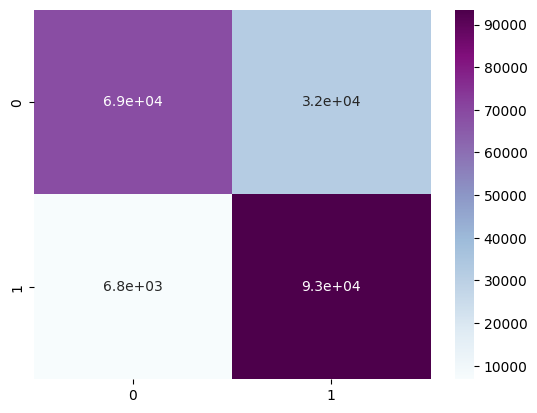

In [78]:
cm = confusion_matrix(y_test,xgb_pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')


In [79]:
print('Accuracy score of  is XGBClassifier is  ',accuracy_score(y_test,xgb_pred))

Accuracy score of  is XGBClassifier is   0.8086124401913876


In [80]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.91      0.69      0.78    100328
           1       0.75      0.93      0.83    100312

    accuracy                           0.81    200640
   macro avg       0.83      0.81      0.81    200640
weighted avg       0.83      0.81      0.81    200640



:**ROC (Receiver Operating Characteristic) AUC (Area Under the Curve) score**

In [81]:
from sklearn.metrics import roc_auc_score # IMPORTING LIBRABRY FOR ROC_AUC SCORE
from sklearn.metrics import roc_curve     # IMPORTING LIBRABRY FOR ROC_CURVE

In [82]:
AUC_xgb =roc_auc_score(xgb_pred,y_test)
print("ROC_AUC Score of XGBClassifier is:",AUC_xgb)

ROC_AUC Score of XGBClassifier is: 0.8285865026432877


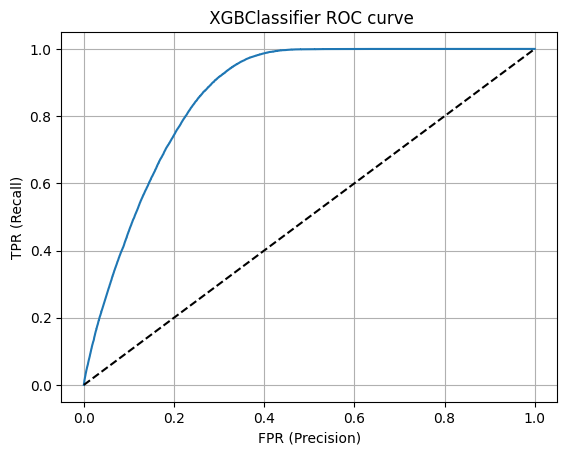

In [83]:
# Get probability estimates for test set
y_score = xgb.predict_proba(x_test)[:, 1]

# Get true binary labels for test set
y_true = y_test

# Set pos_label to 1 since we are working with a binary classification problem
pos_label = 1

fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=1)

plt.title(' XGBClassifier ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.grid(True)
plt.show()


# **Comparing the model**

---



In [84]:
model_name =['Logistic regression', 'KNeighbors','Randomforest','XGBClassifier']

data={"Accuracy":[acc_lr,acc_knn,acc_rf,acc_xgb],"Recall":[recall_lr,recall_knn,recall_rf,recall_xgb],
      "Precision":[precision_lr,precision_knn,precision_rf,precision_xgb],
    'f1_score':[f1score_lr,f1score_knn,f1score_rf,f1score_xgb],
    "ROC_AUC":[AUC_LR,AUC_knn,AUC_rf,AUC_xgb]}





In [85]:
result=pd.DataFrame(data=data,index=model_name)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.783897,0.976414,0.704957,0.818772,0.833305
KNeighbors,0.853055,0.964351,0.788761,0.867763,0.871456
Randomforest,0.945878,0.997119,0.904424,0.948512,0.950607
XGBClassifier,0.808612,0.931892,0.747553,0.829606,0.828587


**From the above  results ,we can see that  the Random Forest model has the**


**highest accuracy with (94%),**

**recall(99%),**

**precision(90%),**

**f1 score(94%),**

**and ROC-AUC (94%) among the four models.**

**The Random Forest model outperforms all other model so random forest would be our  the best choice.**

# **Summary**

---





The health insurance cross sell prediction dataset is a dataset that contains information about customers of an insurance company and whether they have purchased a particular insurance product. The goal is to build a predictive model that can accurately identify which customers are likely to purchase the product.



**In this project, we analyzed the dataset and performed exploratory data analysis to understand the patterns and relationships in the data. We then preprocessed the data and trained four different classification models:**

 **Logistic Regression, KNN, Random Forest, and XGBoost.**










# **Conclusion**

---



**1.Starting from loading our dataset, we initially checked for null values and duplicates. There were no null values and duplicates so treatment of such was not required.**

**Through Exploratory Data Analysis,**




**2.we observed that customers belonging to youngAge are more interested in vehicle response.while Young people below 30 are not interested in vehicle insurance.**



**3.We observed that customers having vehicles older than 2 years are more likely to be interested in vehicle insurance. Similarly, customers having damaged vehicles are more likely to be interested in vehicle insurance.**

**4.The variable such as Age, Previously_insured,Annual_premium are more afecting the target variable.**

**5.For Feature Selection, we applied the Mutual Information technique. Here we observed that Previously_Insured is the most important feature and has the highest impact on the dependent feature and there is no correlation between the two.**

**6.We observed that the target variable was highly imbalanced.So this issue was solved by using Random Over Sample resampling technique.**

**7.we applied feature scaling techniques to normalize our data to bring all features on the same scale and make it easier to process by ML algorithms.**

**8.Further, we applied Machine Learning Algorithms to determine whether a customer would be interested in Vehicle Insurance.**


For the **logistic regression we got an accuracy of 78%**  for the

**KNN classifier we got an accuracy of 85%** for

**XGBClassifier we got the aacuracy of 81%** whereas,.

# We are getting the **highest accuracy of about 94% and ROC_AUC score of 94% with Random forest**

**Based on the metrics , it appears that the random forest model has the highest performance in terms of accuracy, recall, precision, F1-score, and ROC-AUC.**

**K-nearest neighbors also perform well, but not as well as random forest. Logistic regression and XGBoost have lower performance, especially in terms of precision and ROC-AUC.**

 **So, From this we can conclude that random forest is the best models as compare to the other models.**


# **Thus, for the given problem, the models created by Random Forest.**